In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import pylab

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Contents

* Interactive widgets in the notebook.
* Load images. Load videos.
* Interactively compare original and processed images

## ipython widgets

ipython widgets combine Python code and Javascript/HTML/CSS GUI components of the web browser.  These widgets enable users to explore their code and data interactively.

* Using `interactive`: https://github.com/ipython/ipywidgets/blob/master/docs/source/examples/Using%20Interact.ipynb

In [30]:
from ipywidgets import interact, fixed

def factorial(n):
    if n ==0:
        return 1
    # might need to introduce `reduce` here
    return reduce(lambda x, y: x*y, range(1, n+1))

print factorial(1)
print factorial(2)
print factorial(5)

1
2
120


Interactively compute the factorial of the value determined by a scrollbar.

In [31]:
# interact takes a function, and a list of its arguments.
# n = (1, 10, 1) = (min, max, step)
interact(factorial, n=(1, 10, 1))

120

<function __main__.factorial>

We can also interact with multiple arguments.

In [32]:
def mn_outer_product(m, n):
    """Compute the outer product of [1, ..m] and [1,...n]"""
    a = np.arange(1, m+1)
    b = np.arange(1, n+1)
    return np.outer(a, b)
    

In [33]:
# test the function
mn_outer_product(3, 4)

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12]])

Let us `interact` with this outer product function.

In [34]:
interact(mn_outer_product, m=(1, 5, 1), n=(1, 10, 1))

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15]])

<function __main__.mn_outer_product>

`interact` works with `matplotlib`.

In [35]:
def plot_mn_product(m, n):
    plt.figure()
    mat = mn_outer_product(m ,n)
    plt.imshow(mat, interpolation='None')
    plt.colorbar()

<function __main__.plot_mn_product>

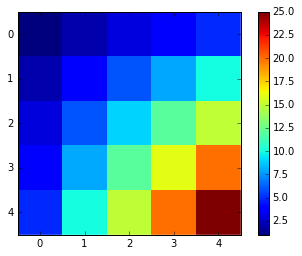

In [36]:
interact(plot_mn_product, m=(1, 10, 1), n=(1, 10, 1))

The function takes two arguments. But I want to fix one and vary only the other one. How? There are two ways.

<function __main__.plot_m_product>

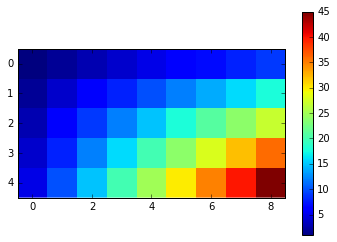

In [37]:
# fix here
n = 9
def plot_m_product(m):
    plot_mn_product(m, n)

interact(plot_m_product, m=(1, 10, 1))
    

<function __main__.plot_mn_product>

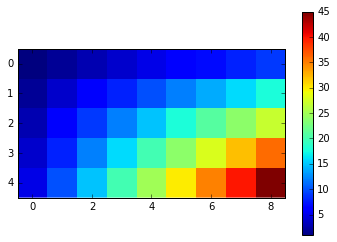

In [38]:
# Another less tedious way
interact(plot_mn_product, m=(1, 10, 1), n=fixed(9))

## Load a image to a numpy array

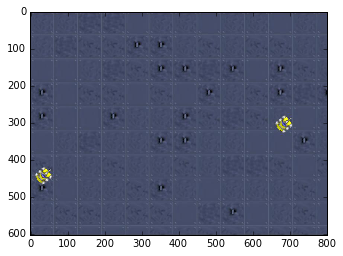

In [39]:
import imageio

im = imageio.imread('still_2yellow0.jpg')
plt.imshow(im)

In [40]:
# width x height x 3 (RGB color channels)
im.shape

(603, 802, 3)

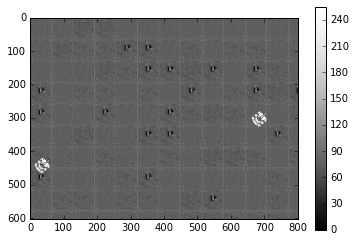

In [41]:
def show_greys(img):
    plt.imshow(img, cmap=plt.cm.Greys_r)
    plt.colorbar()
    
# Access a channel
blue = im[:, :, 1]
# plot it in grayscale
show_greys(blue)

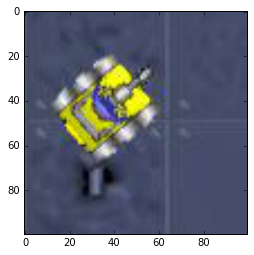

In [42]:
# Taking a patch
patch = im[400:500, 0:100, :]
plt.imshow(patch)

## Basic image processing

In [43]:
# We will use `scikit-image` package. http://scikit-image.org/
from skimage import data, io, filters
import scipy as sc
import scipy.misc as misc

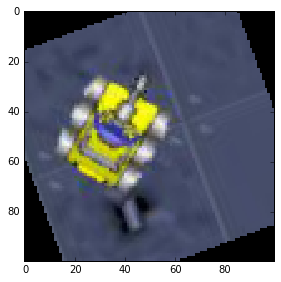

In [44]:
# rotate an image
deg = 20.5
# rotate counter-clockwise
rot_tanks = misc.imrotate(patch, deg)
io.imshow(rot_tanks)

In [45]:
# load an image of coins
coins = data.coins()
coins.shape

(303, 384)

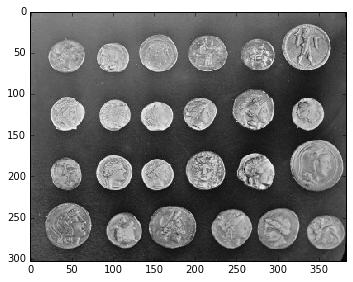

In [46]:
# Almost the same as plt.imshow() except perhaps skimage.io is a 
# bit smarter in detecting that this is a grayscaled image
io.imshow(coins)

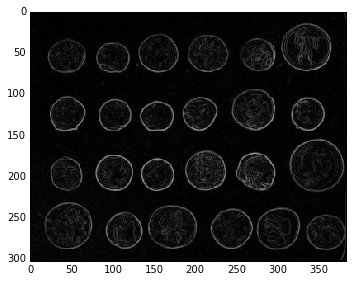

In [47]:
# Edge detection
# `edges` is another image
edges = filters.sobel(coins)
io.imshow(edges)


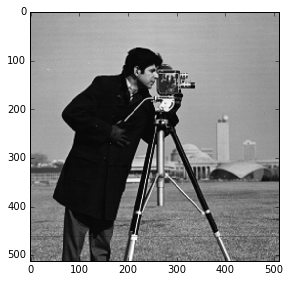

In [48]:
camera = data.camera()
io.imshow(camera)

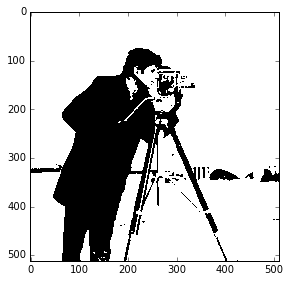

In [49]:
# Thresholding 
#thresh = filters.threshold_otsu(camera)
thresh = 70
binary = camera > thresh
io.imshow(binary)

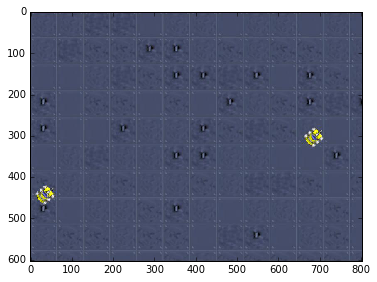

In [50]:
tanks = imageio.imread('still_2yellow0.jpg')
io.imshow(tanks)

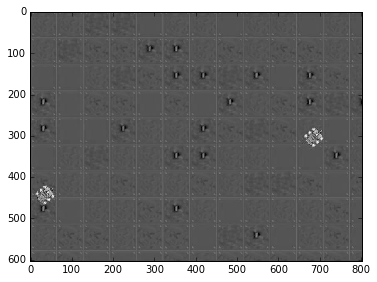

In [51]:
# One way to convert to a grayscaled image is to take the mean of the 3 channels.
tanks_mean = np.mean(tanks, axis=2)
tanks_mean = tanks_mean.astype(np.uint8)
io.imshow(tanks_mean)

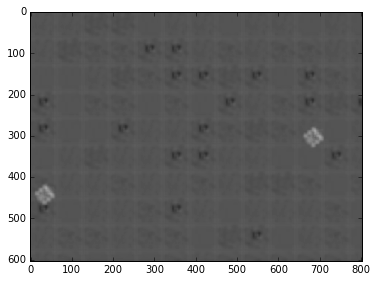

In [52]:
from scipy.ndimage import filters as scfil

# convolve with a filter 
# http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.ndimage.filters.convolve.html
    
#fil = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
fil = np.ones((10, 10))/100.0
conv = scfil.convolve(tanks_mean, fil)
io.imshow(conv)


In [53]:
conv.shape

(603, 802)

## Load a video

There are 290 frames.


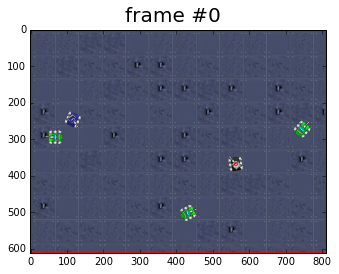

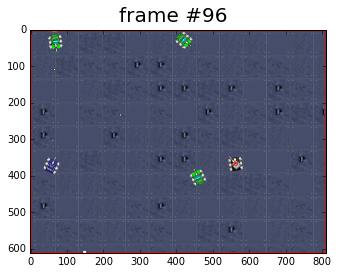

In [54]:
# see http://stackoverflow.com/questions/29718238/how-to-read-mp4-video-to-be-processed-by-scikit-image

filename = 'tanks.ogg'
vid = imageio.get_reader(filename,  'ffmpeg')
n_frames = vid.get_length()
print 'There are %d frames.'%n_frames

# frame numbers to show
nums = [0, n_frames/3]
for num in nums:
    image = vid.get_data(num)
    fig = plt.figure()
    fig.suptitle('frame #{}'.format(num), fontsize=20)
    plt.imshow(image)


In [55]:
image.shape

(612, 812, 3)

## Interactively display frames

Use ipython widgets to interactively show frames

In [56]:
def stack_frames(vid_reader):
    """Take in a video reader, read all the frames and stack them into a list."""
    n = vid_reader.get_length()
    frames = []
    for frame in vid_reader:
        frames.append(frame)
    return frames
    
def show_frame(stack, frame_ind=0):
    #img = vid_reader.get_data(frame_ind)
    img = stack[frame_ind]
    plt.imshow(img)
    plt.title('frame #%d'%frame_ind, fontsize=20)

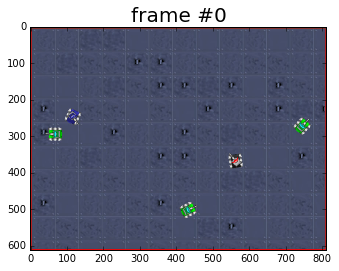

In [57]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import ipywidgets as widgets

# This may take some memory
frames = stack_frames(vid)

vs = interactive(show_frame, stack=fixed(frames), frame_ind=(0, n_frames-1));
display(vs)

## Track the blue tank

In [58]:
# Basic image processing in Numpy 
# http://scikit-image.org/docs/stable/user_guide/numpy_images.html

In [59]:
def between(img, lb, ub):
    """Return a logical numpy array showing elements that are in [lb, ub]."""
    return (img >= lb) & (img <= ub)

def get_blue_tank_mask(img):
    # The blue tank has color roughly (r,g,b) = (43, 37, 151)
    blue_tank_mask = between(img[:, :, 0], 30, 60) & \
        between(img[:, :, 1], 30, 60) & between(img[:, :, 2], 140, 180)
    return blue_tank_mask


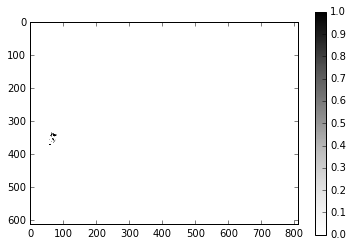

In [60]:
img = frames[77]
#plt.figure(figsize=(10, 6))
blue_tank_mask = get_blue_tank_mask(img)
plt.imshow(blue_tank_mask, cmap=mpl.cm.Greys)
plt.colorbar()

In [61]:
def show_2frames(img1, img2):
    """Show the two images."""
    scale = 1.4
    plt.figure(figsize=(scale*8, scale*6))
    plt.subplot(121)
    plt.imshow(img1)
    plt.subplot(122)
    plt.imshow(img2)
    
def show_2frames_func(f1, f2, index):
    """f1, f2 are function handles such that f: index -> imshow(images[index])."""
    scale = 1.4
    plt.figure(figsize=(scale*8, scale*6))
    plt.subplot(121)
    f1(index)
    plt.subplot(122)
    f2(index)
    
#show_2frames(frames[0], frames[10])

### Interactively show original frames, and the blue tank mask

blue tank at: (x, y) = (23.5, 451)


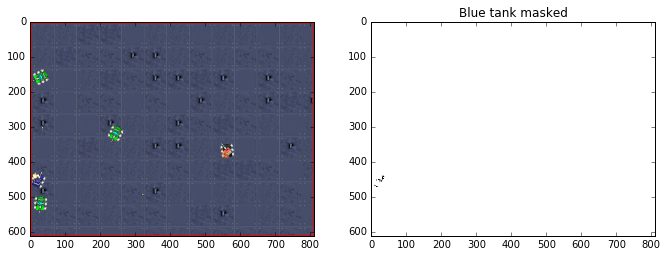

In [62]:
def compare_blue_masked(frame_ind):
    def show_blue_mask(frame_ind):
        blue_mask = get_blue_tank_mask(frames[frame_ind])
        plt.imshow(blue_mask, cmap=mpl.cm.Greys)
        plt.title('Blue tank masked')
        # print coordinate
        mean0 = np.mean(blue_mask, 0)
        mean1 = np.mean(blue_mask, 1)
        x = np.median(np.where(mean0))
        y = np.median(np.where(mean1))
        print 'blue tank at: (x, y) = (%.3g, %.3g)'%(x, y)
        
    show_2frames_func(
        lambda i: plt.imshow(frames[i]), 
        show_blue_mask,
        frame_ind
    )

vs = interactive(compare_blue_masked, frame_ind=(0, n_frames-1));
display(vs)

## Save a video as a sequence of images

In [63]:
import os

#vdo_fname = 'still_1gray'
vdo_fname = 'still_2yellow'
save_folder = vdo_fname
vdo_ext = '.ogg'
vdo_fpath = './' + vdo_fname + vdo_ext
vid = imageio.get_reader(vdo_fpath,  'ffmpeg')
n_frames = vid.get_length()

# frame numbers to show
frame_inds = range(0, n_frames, 50)
for i, num in enumerate(frame_inds):
    image = vid.get_data(num)
    # write img
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    dest_fname = '%s%d.jpg'%(vdo_fname, i)
    save_fpath = os.path.join(save_folder, dest_fname)
    imageio.imwrite(save_fpath, image)

print 'There are %d frames.'%n_frames
print 'Extracted %d frames'%(i+1)

There are 511 frames.
Extracted 11 frames
